In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import expon
import scipy.stats as ss

In [3]:
df_boston_pour=pd.read_csv('Boston_PourData_unprotected.csv')
df_DC_pour=pd.read_csv('DC_pourData_unprotected.csv')
df_toronto_pour=pd.read_csv('Toronto_PourData_unprotected.csv')

In [18]:
def deliver(df):
  return sum(df['payload_status']=='delivered')/len(df)*100

In [19]:
def recall(df):
  return sum(df['payload_status']=='recalled')/len(df)*100

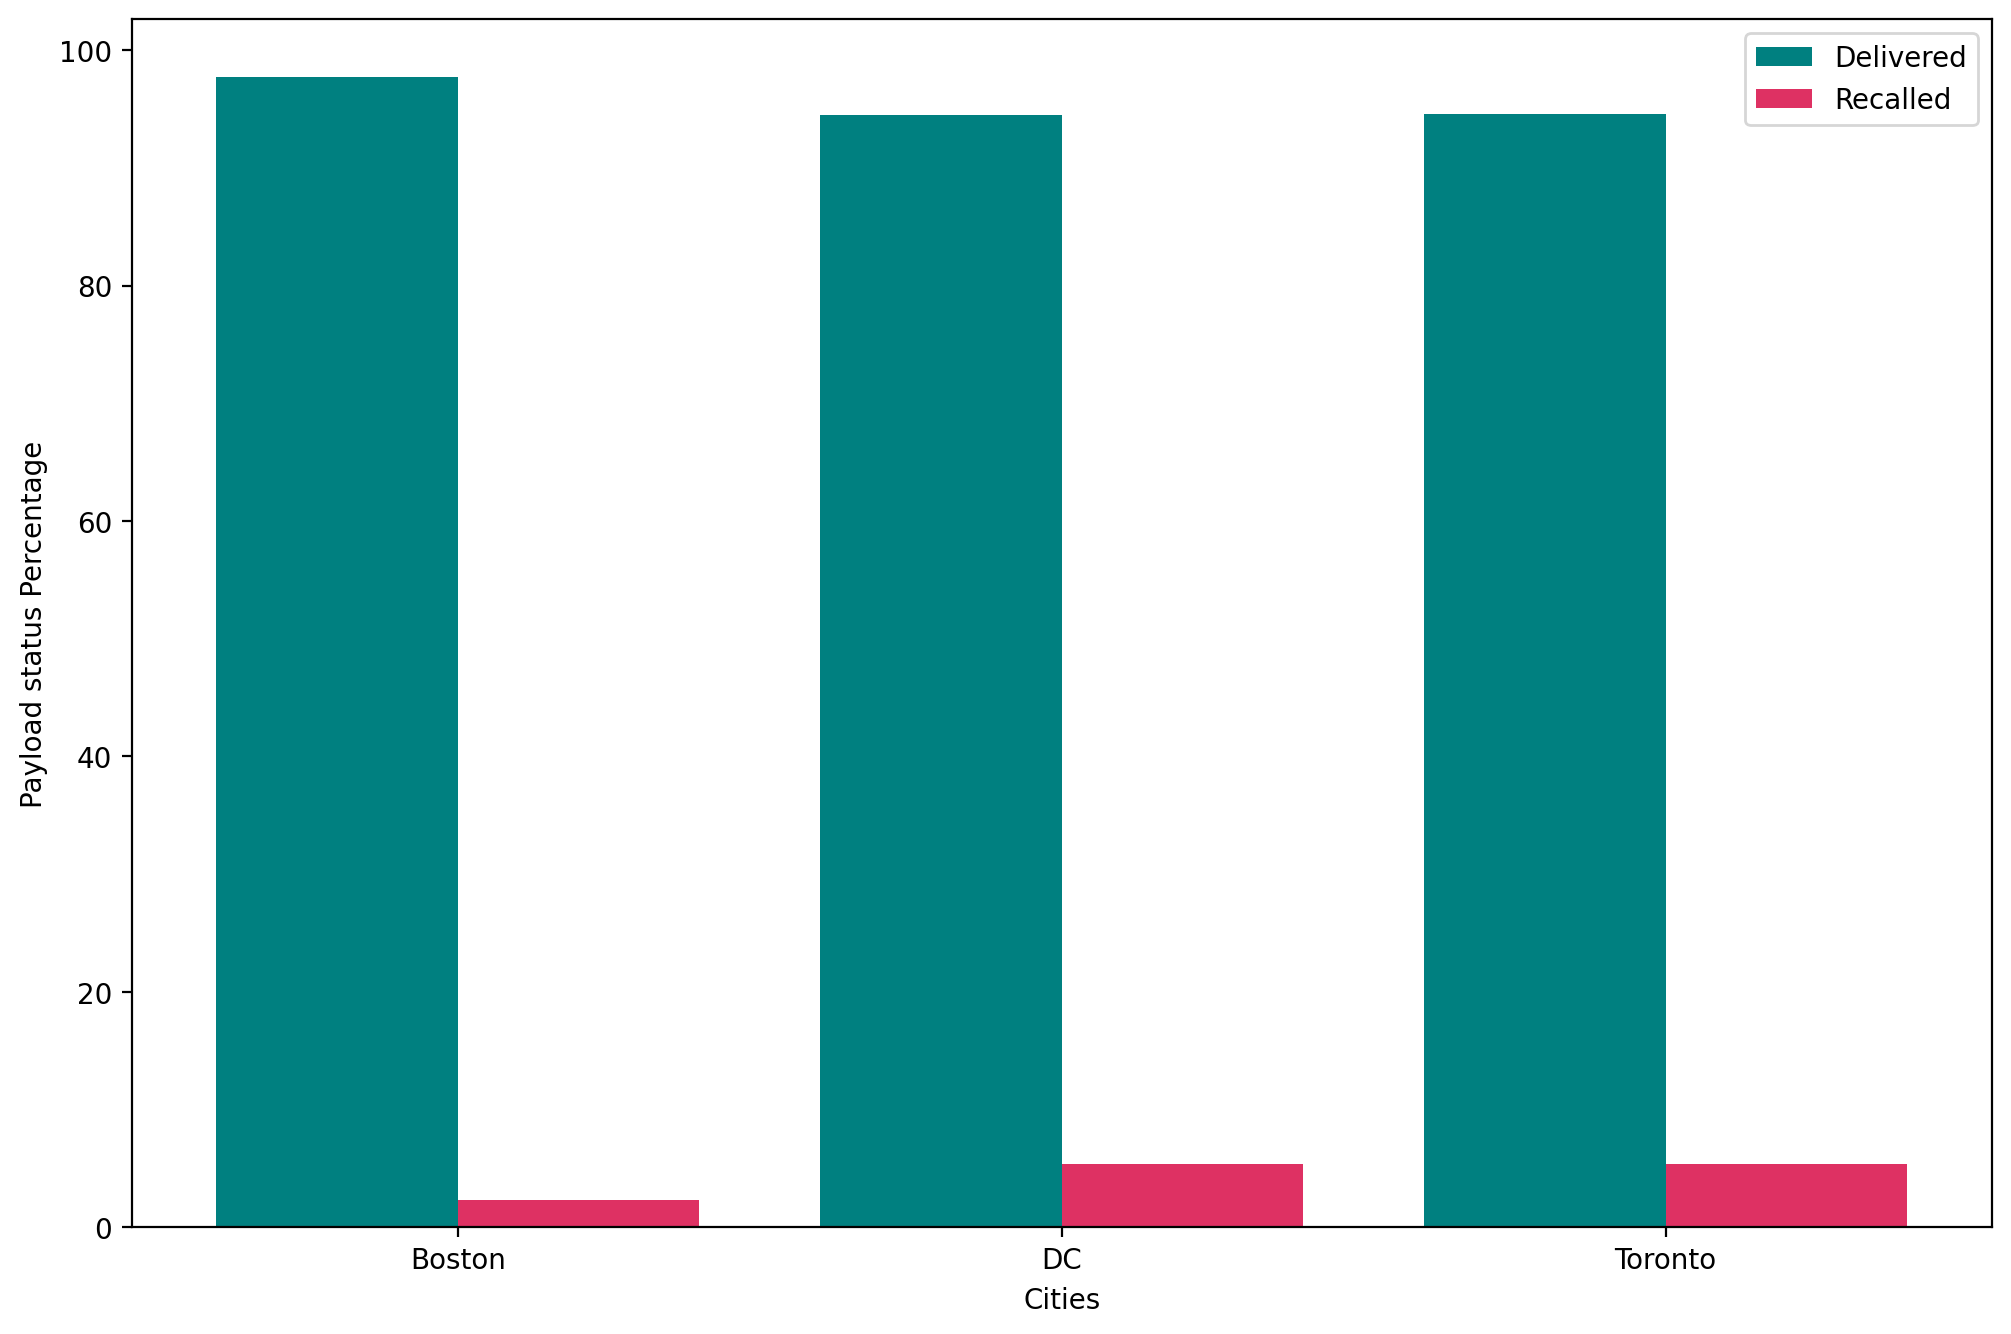

In [46]:
import matplotlib.pyplot as plt
Labels = ['Boston', 'DC' , 'Toronto']
x=np.array([1,2,3])
y = [deliver(df_boston_pour), deliver(df_DC_pour), deliver(df_toronto_pour)]
z = [recall(df_boston_pour), recall(df_DC_pour), recall(df_toronto_pour)]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8) , dpi=200)
ax.bar(x-0.2, y, width=0.4, color='teal', align='center', label='Delivered')
ax.bar(x+0.2, z, width=0.4, color='#DE3163', align='center', label='Recalled')
ax.set_xticks(x)
ax.set_xticklabels(Labels)
ax.set_xlabel('Cities')
ax.set_ylabel('Payload status Percentage')
ax.legend()
fig.savefig('Picture1.jpeg', dpi=200)
plt.show()

In [39]:
List=['payload_event_batch_start_time', 'payload_event_batch_end_time',
       'payload_event_departure_time', 'payload_event_arrival_time',
       'payload_event_pouring_start_time', 'payload_event_pouring_finish_time', 'payload_event_wash_time',
       'payload_event_to_plant_time', 'payload_event_at_plant_time']

In [40]:
for i in List:
  df_boston_pour[i]= pd.to_datetime(df_boston_pour[i])
  df_DC_pour[i]= pd.to_datetime(df_DC_pour[i])
  df_toronto_pour[i]=pd.to_datetime(df_toronto_pour[i])

In [78]:
fig , axes=plt.subplots(nrows=3, ncols=5, dpi=400, figsize=(30 , 20))
Labels = ['Boston', 'DC' , 'Toronto']
pad = 5 # in points
for ax, row in zip(axes[:,0], Labels):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='40', ha='right', va='center', rotation=90,)
ax=axes.flat

for df, i in zip([df_boston_pour,df_DC_pour,df_toronto_pour], [0,5,10]):
  Batch=(df['payload_event_batch_end_time']-df['payload_event_batch_start_time']).values
  Batch=Batch.astype('int')/1e9
  Batch_pos=Batch[Batch>0]
  n, bins, patches =ax[i+0].hist(Batch_pos/60,  25, color='teal', density=True, alpha=0.5,label=f'Empirical: Max={np.round(max(Batch_pos/60), 1)} Min={np.round(min(Batch_pos/60), 1)}')
  ax[i+0].set_ylabel('Probability density')
  ax[i+0].set_xlabel('payload batch time')
  (mu, sigma) = norm.fit(Batch_pos/60)
  y = norm.pdf( bins, mu, sigma)
  l = ax[i+0].plot(bins, y, '--',color='darkcyan', linewidth=2, label='$fitted\; \mu=%s\; \sigma=%s$'%(np.round(mu, 3),np.round(sigma, 3)))
  ax[i+0].legend()

  Batch=(df['payload_event_arrival_time']-df['payload_event_departure_time']).values
  Batch=Batch.astype('int')/1e9
  Batch_pos=Batch[Batch>0]
  n, bins, patches =ax[i+1].hist(Batch_pos/60,  25, color='#DE3163', density=True, alpha=0.5, label=f'Empirical: Max={np.round(max(Batch_pos/60), 1)} Min={np.round(min(Batch_pos/60), 1)}')
  ax[i+1].set_ylabel('Probability density')
  ax[i+1].set_xlabel('payload arrival_time-departure_time')
  (mu, sigma) = norm.fit(Batch_pos/60)
  y = norm.pdf( bins, mu, sigma)
  l = ax[i+1].plot(bins, y, '--',color='purple', linewidth=2, label='$fitted\; \mu=%s \;\sigma=%s$'%(np.round(mu, 3),np.round(sigma, 3)))
  ax[i+1].legend()

  Batch=(df['payload_event_pouring_finish_time']-df['payload_event_pouring_start_time']).values
  Batch=Batch.astype('int')/1e9
  Batch_pos=Batch[Batch>0]
  n, bins, patches =ax[i+2].hist(Batch_pos/60,  25, color='orange', density=True, alpha=0.5, label=f'Empirical: Max={np.round(max(Batch_pos/60), 1)} Min={np.round(min(Batch_pos/60), 1)}')
  ax[i+2].set_ylabel('Probability density')
  ax[i+2].set_xlabel('payload event pouring  finish- start time)')
  mu, sigma= expon.fit(Batch_pos/60)
  y = expon.pdf( bins, mu, sigma)
  l = ax[i+2].plot(bins, y, '--',color='darkorange', linewidth=2, label='$fitted \;Exponential\; loc=%s\; \kappa=%s$'%(np.round(mu, 3),np.round(sigma, 3)))
  ax[i+2].legend()


  Batch1=(df_boston_pour['payload_event_at_plant_time']-df_boston_pour['payload_event_batch_start_time']).values
  Batch1=Batch1.astype('int')/1e9
  Batch2=(df_boston_pour['payload_event_arrival_time']-df_boston_pour['payload_event_departure_time']).values
  Batch2=Batch2.astype('int')/1e9
  Batch3=(df_boston_pour['payload_event_at_plant_time']-df_boston_pour['payload_event_to_plant_time']).values
  Batch3=Batch3.astype('int')/1e9
  Batch4=Batch3+Batch2
  Batch5=np.array([Batch4[i]/Batch1[i] for i in range(len(df_boston_pour))])
  Batch_pos=Batch5[Batch5>0]*100
  Batch_pos=Batch_pos[Batch_pos<100]
  n, bins, patches =ax[i+4].hist(Batch_pos,  25, color='red', density=True, alpha=0.5, label=f'Empirical: Max={np.round(max(Batch_pos/60), 1)} Min={np.round(min(Batch_pos/60), 1)}')
  ax[i+4].set_ylabel('Probability density')
  ax[i+4].set_xlabel('payload event Journey time/ Overall time %')
  (mu, sigma) = norm.fit(Batch_pos)
  y = norm.pdf( bins, mu, sigma)
  l = ax[i+4].plot(bins, y, '--',color='#A93226', linewidth=2, label='$fitted\; \mu=%s\; \sigma=%s$'%(np.round(mu, 3),np.round(sigma, 3)))
  ax[i+4].legend()

  Batch1=(df['payload_event_to_plant_time']-df['payload_event_arrival_time']).values
  Batch1=Batch1.astype('int')/1e9
  Batch1=Batch1[Batch1>0]
  n, bins, patches =ax[i+3].hist(Batch1/3600,  25, color='blue', density=True, alpha=0.5, label=f'Empirical: Max={np.round(max(Batch_pos/60), 1)} Min={np.round(min(Batch_pos/60), 1)}')
  ax[i+3].set_ylabel('Probability density')
  ax[i+3].set_xlabel('payload event Journey time/ Overall time %')
  (mu, sigma) = norm.fit(Batch1/3600)
  y = norm.pdf( bins, mu, sigma)
  l = ax[i+3].plot(bins, y, '--',color='#9B59B6', linewidth=2, label='$fitted\; \mu=%s\; \sigma=%s$'%(np.round(mu, 3),np.round(sigma, 3)))
  ax[i+3].legend()
fig.tight_layout()
fig.savefig('Picture2.jpeg', dpi=400)
